In [1]:
import numpy as np
import os, sys, scipy
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
import scikits.bootstrap as bootstrap  
from scipy.stats.stats import spearmanr, ttest_1samp, zscore
from scipy.ndimage.filters import gaussian_filter1d
from necessary_analysis_scripts import resampling_statistics,  run_stats_onetail, run_stats_twotail
from necessary_analysis_scripts import prettify_plot, calculate_aprime, load_data, load_data_cd

# Plotting defaults 

In [2]:
#plot within jupyter notebooks
%matplotlib inline 

#tab completion for files
%config IPCompleter.greedy=True 

#supress scientific notation
np.set_printoptions(suppress=True) 

#font defaults
plt.rcParams.update({'font.size': 14})
rc('text', usetex=False)
plt.rcParams['pdf.fonttype'] = 42
if os.path.isfile("/Library/Fonts/HelveticaNeue-Light.ttf"): 
    prop = fm.FontProperties(fname="/Library/Fonts/HelveticaNeue-Light.ttf",size=24)
else:
    prop = fm.FontProperties(size=24)

#color defaults
col_corr = [0/255.,98/255.,100/255.]
col_incorr = [218/255.,66/255.,36/255.]

# Load data

Load data from both Experiments 1a and 1b

In [3]:
dat_1a = load_data('expt1a')
dat_1b = load_data('expt1b')

nb = 4
nt = 800

nsubj_1a = len(dat_1a)
freq_acc_1a = np.zeros(nsubj_1a)
infreq_acc_1a = np.zeros(nsubj_1a)
rt_var_1a = np.zeros((nsubj_1a,nb))
wm_n_1a = np.zeros(nsubj_1a)

nsubj_1b = len(dat_1b)
freq_acc_1b = np.zeros(nsubj_1a)
infreq_acc_1b = np.zeros(nsubj_1b)
rt_var_1b = np.zeros((nsubj_1b,nb))
wm_n_1b = np.zeros(nsubj_1b)


# Correlate attention lapses with WM across participants

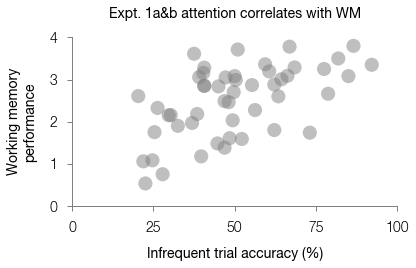

Expt1a&1b:	r =  0.56 p =  0.0
Expt1a:	r =  0.52 p =  0.007
Expt1b:	r =  0.57 p =  0.003


In [4]:
#expt1a
for isubj in range(nsubj_1a):
    infreq_trials = dat_1a[isubj].freq_trials[:(nb*nt)]==0
    freq_acc_1a[isubj] = np.mean(dat_1a[isubj].acc[:(nb*nt)][dat_1a[isubj].freq_trials[:(nb*nt)]==1]==1)
    infreq_acc_1a[isubj] = np.mean(dat_1a[isubj].acc[:(nb*nt)][infreq_trials]==1)
    
    for iblock in range(nb):
        itrials = iblock*nt+np.arange(800)

        idx = np.logical_and(dat_1a[isubj].freq_trials[itrials]==1,dat_1a[isubj].acc[itrials]==1)
        rt_var_1a[isubj,iblock] = np.std(dat_1a[isubj].rts[itrials[idx]]*1000)        
    
    probe_trials = dat_1a[isubj].probe_trials[:(nb*nt)]==1
    wm_n_1a[isubj] = np.mean(dat_1a[isubj].wholereport_respacc_total[:(nb*nt)][probe_trials])

#expt1b
for isubj in range(nsubj_1b):
    infreq_trials = dat_1b[isubj].freq_trials[:(nb*nt)]==0
    freq_acc_1b[isubj] = np.mean(dat_1a[isubj].acc[:(nb*nt)][dat_1b[isubj].freq_trials[:(nb*nt)]==1]==1)
    infreq_acc_1b[isubj] = np.mean(dat_1b[isubj].acc[:(nb*nt)][infreq_trials]==1)

    for iblock in range(nb):
        itrials = iblock*nt+np.arange(800)

        idx = np.logical_and(dat_1b[isubj].freq_trials[itrials]==1,dat_1b[isubj].acc[itrials]==1)
        rt_var_1b[isubj,iblock] = np.std(dat_1b[isubj].rts[itrials[idx]]*1000)  
    
    probe_trials = dat_1b[isubj].probe_trials[:(nb*nt)]==1
    wm_n_1b[isubj] = np.mean(dat_1b[isubj].wholereport_respacc_total[:(nb*nt)][probe_trials])


#append results from each study
infreq_acc = np.append(infreq_acc_1a,infreq_acc_1b)*100
wm_n = np.append(wm_n_1a,wm_n_1b)

#plot 
fig = plt.figure()
ax = plt.subplot(111)
ax.scatter(infreq_acc,wm_n,200,edgecolor='None',facecolor='gray',alpha=.5)
prettify_plot(ax,ylim=([0,4]), yt=([0,1,2,3,4,5,6]),ytl=([0,1,2,3,4,5,6]),yl='Working memory\nperformance',ylrot=90,
              xlim=(0,100), xt=([0,25,50,75,100]),xtl=([0,25,50,75,100]),xl='Infrequent trial accuracy (%)',
              t='Expt. 1a&b attention correlates with WM')
plt.show()

#print correlations from both studies combined and each study individually
r,p = spearmanr(infreq_acc,wm_n)
print('Expt1a&1b:\tr = ',np.round(r,decimals=2),'p = ',np.round(p,decimals=3))

r,p = spearmanr(infreq_acc_1a,wm_n_1a)
print('Expt1a:\tr = ',np.round(r,decimals=2),'p = ',np.round(p,decimals=3))

r,p = spearmanr(infreq_acc_1b,wm_n_1b)
print('Expt1b:\tr = ',np.round(r,decimals=2),'p = ',np.round(p,decimals=3))

# Correlate RT variability with WM across participants

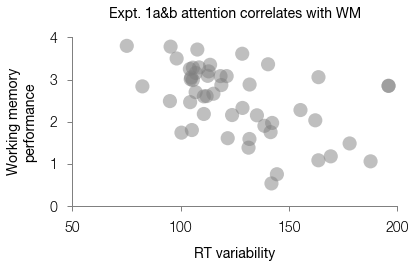

Expt1a&1b:	r =  -0.505 p =  0.00019
Expt1a:	r =  -0.393 p =  0.04726
Expt1b:	r =  -0.634 p =  0.00088


In [5]:
rt_var = np.append(np.mean(rt_var_1a,axis=1),np.mean(rt_var_1b,axis=1))
wm_n = np.append(wm_n_1a,wm_n_1b)

fig = plt.figure()
ax = plt.subplot(111)
ax.scatter(rt_var,wm_n,200,edgecolor='None',facecolor='gray',alpha=.5,clip_on=False)
prettify_plot(ax,ylim=([0,4]), yt=([0,1,2,3,4,5,6]),ytl=([0,1,2,3,4,5,6]),yl='Working memory\nperformance',ylrot=90,
             xlim=(50,200), xt=([0,50,100,150,200,250]),xtl=([0,50,100,150,200,250]),xl='RT variability',
             t='Expt. 1a&b attention correlates with WM')
plt.show()

r,p = spearmanr(rt_var,wm_n)
print('Expt1a&1b:\tr = ',np.round(r,decimals=3),'p = ',np.round(p,decimals=5))

r,p = spearmanr(np.mean(rt_var_1a,axis=1),wm_n_1a)
print('Expt1a:\tr = ',np.round(r,decimals=3),'p = ',np.round(p,decimals=5))

r,p = spearmanr(np.mean(rt_var_1b,axis=1),wm_n_1b)
print('Expt1b:\tr = ',np.round(r,decimals=3),'p = ',np.round(p,decimals=5))
